In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Завантаження датасету
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("heart.csv")

Saving heart.csv to heart.csv


In [3]:
# Попередній аналіз даних
display(df.head())
display(df.info())
display(df.describe())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


None

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [4]:
# Перевірка на пропущені значення
print("Пропущені значення:")
print(df.isnull().sum())

Пропущені значення:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


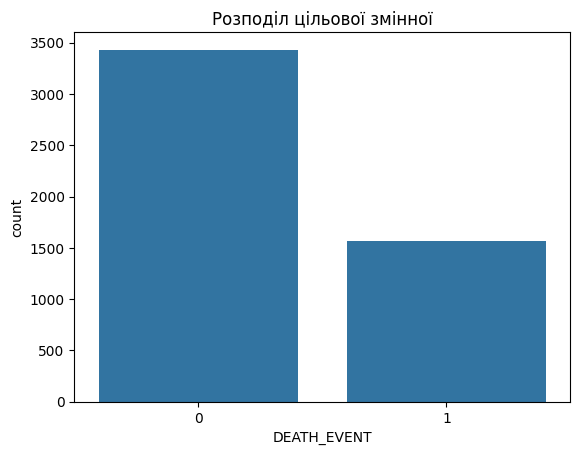

In [12]:
sns.countplot(x=df['DEATH_EVENT'])
plt.title("Розподіл цільової змінної")
plt.show()

In [14]:
# Розділення даних на тренувальну та тестову вибірки
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Логістична регресія (класична ML-модель)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [17]:
# Оцінка моделі класичного ML
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.83      0.83      0.83      1000

Confusion Matrix:
[[609  77]
 [ 93 221]]


In [18]:
# Логістична регресія (нейронна мережа)
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


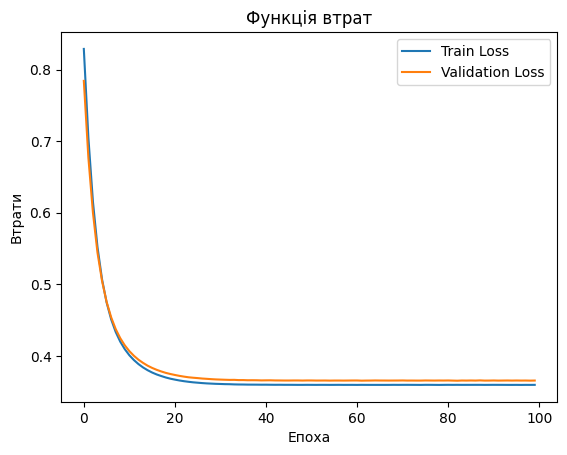

In [19]:
# Графік функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Функція втрат")
plt.xlabel("Епоха")
plt.ylabel("Втрати")
plt.legend()
plt.show()

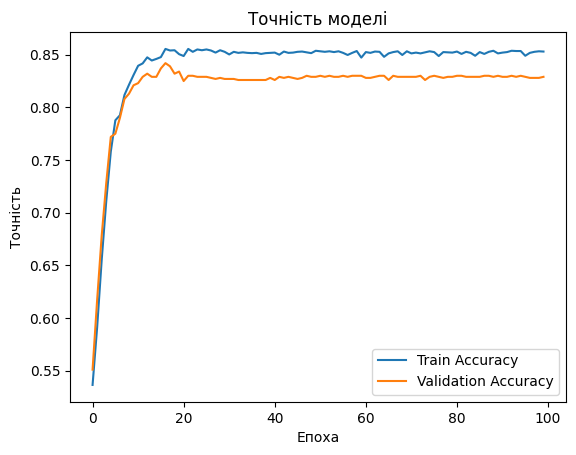

In [20]:
# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Точність моделі")
plt.xlabel("Епоха")
plt.ylabel("Точність")
plt.legend()
plt.show()

In [21]:
# Оцінка моделі нейромережі
y_nn_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
print("Neural Network Accuracy:", accuracy_score(y_test, y_nn_pred))
print("Classification Report:")
print(classification_report(y_test, y_nn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_nn_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.83      0.83      0.83      1000

Confusion Matrix:
[[608  78]
 [ 93 221]]


У ході дослідження було проведено порівняння двох підходів до вирішення задачі бінарної класифікації: класичної логістичної регресії та нейронної мережі. Логістична регресія є простою та ефективною моделлю, яка забезпечує швидке навчання та легку інтерпретацію результатів. Вона показала високу точність на тестових даних, що свідчить про її ефективність для даного набору даних. Однак логістична регресія має обмеження у здатності моделювати складні нелінійні залежності між ознаками. З іншого боку, нейронна мережа, хоч і потребує більшої кількості обчислювальних ресурсів і часу для навчання, може виявляти складніші патерни в даних. Вона також досягла високої точності, а її навчання супроводжувалося поступовим зниженням функції втрат і покращенням точності на тестових даних. Аналіз функції втрат показав, що модель добре навчається, хоча можливою проблемою є перенавчання, якщо кількість епох буде надмірною. Таким чином, логістична регресія є хорошим вибором, коли потрібна швидка, інтерпретована та проста у використанні модель, тоді як нейронна мережа може бути корисною у випадках, коли дані мають складніші залежності, які нелегко виявити за допомогою традиційних статистичних методів. Для подальшого вдосконалення моделей можна застосовувати методи підбору гіперпараметрів, використання більш складних архітектур нейронних мереж або інші алгоритми машинного навчання.